In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import sklearn
import graphviz
import sys
from sklearn import metrics
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import RandomizedSearchCV
import os
import numpy as np

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

xl = pd.ExcelFile("Concrete_Data.xls")
xl.sheet_names

df = xl.parse("Sheet1")
df


Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0               1040.0           676.0   28                      79.986111  
1               1055.0           676.0   28                      61.887366  
2                932.0           594.0  270                      40.269535  
3                932.0           594.0  365                      41.052780  
4                978.4           825.5  360                      44.296075  
...                ...             ...  ...                            ...  
1025             870.1           768.3   28                      44.284354  
1026             817.9           813.4   28                      31.178794  
1027             892.4           780.0   28                      23.696601  
1028             989.6           788.9   28                      32.768036  
1029             864.5           761.5   28                      32.401235  

[1030 rows x 9 columns]

In [91]:
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0            1040.0           676.0   28                      79.986111  
1            1055.0           676.0   28                      61.887366  
2             932.0           594.0  270                      40.269535  
3             932.0           594.0  365                      41.052780  
4             978.4           825.5  360                      44.296075

In [92]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.350000        968.000000      779.510000    28.000000   
75%           10.160000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       Concrete compressive strength  
count                    1030.000000  
mean                       35.817836  
std                        16.705679  
min                         2.331808  
25%                        23.707115  
50%                        34.442774  
75%                        46.136287  
max                        82.599225

In [93]:
X = df.drop('Concrete compressive strength', axis=1)
y = df['Concrete compressive strength']

In [94]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [121]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
d = []
for itrain, itest in kf.split(X_scaled, y):
    X_train, X_test = X.iloc[itrain].values, X.iloc[itest].values
    y_train, y_test = y.iloc[itrain].values, y.iloc[itest].values
    regressor = DecisionTreeRegressor(criterion = 'mse', max_features='auto', ccp_alpha = 0.5)
    regressor = regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    

Root Mean Squared Error: 8.186522002352808
Root Mean Squared Error: 6.968498413239529
Root Mean Squared Error: 7.154398448783442
Root Mean Squared Error: 6.564144453334319
Root Mean Squared Error: 9.006809277649946


In [101]:
# n_estimators = [500, 800, 1500, 2500, 5000]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10, 20, 30, 40, 50]
max_depth.append(None)
min_samples_split = range(2,10)
min_samples_leaf = range(1,15)
ccp_alpha = np.arange(0,1,0.1)

In [102]:
grid_param = {'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'ccp_alpha': ccp_alpha}

In [103]:
# DTR = DecisionTreeRegressor(random_state=1)
# DTR_random = RandomizedSearchCV(estimator = DTR, param_distributions = grid_param, n_iter = 500, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)
scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid= grid_param,
              scoring=scoring, cv=5, refit=True)

In [104]:
# DTR_random.fit(X, y)
# print(DTR_random.best_params_)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': [10, 20, 30, 40, 50, None],
                         'max_features':

In [106]:
result = g_cv.cv_results_


In [107]:
r2_score(y_test, g_cv.best_estimator_.predict(X_test))

0.7907647136453742

In [119]:
g_cv.best_estimator_.feature_importances_

array([0.30805687, 0.09832118, 0.04722475, 0.15051871, 0.02021829,
       0.01488907, 0.03303609, 0.32773504])

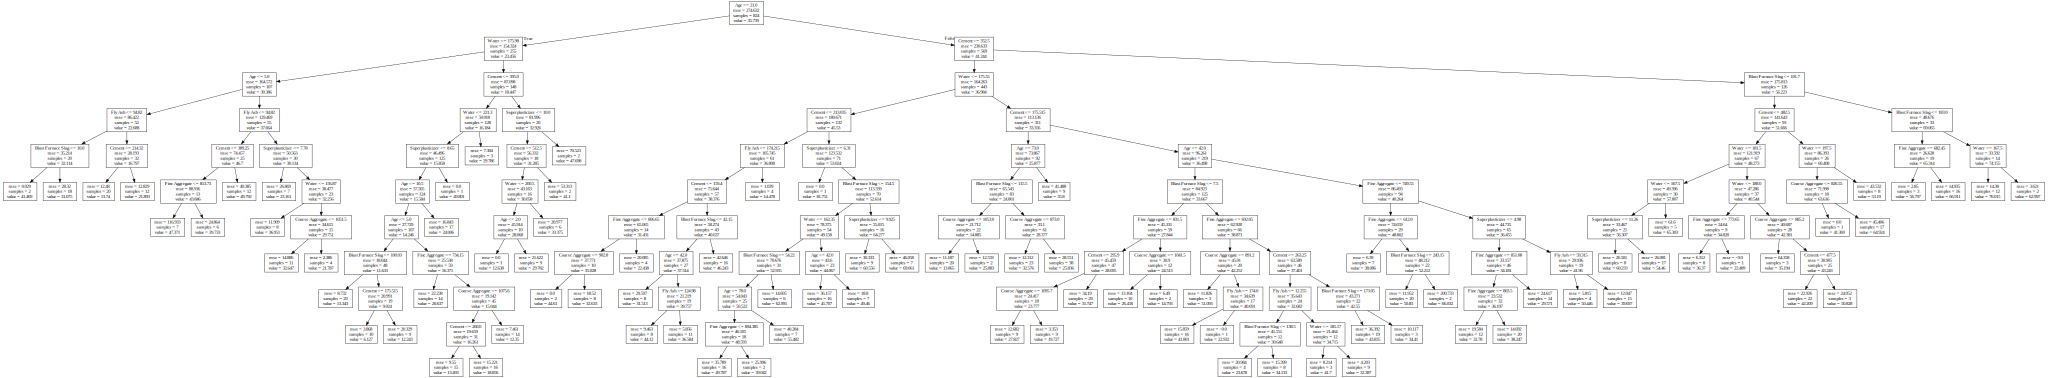

In [126]:
dotfile = open("C:/Users/Karthik/Desktop/BGSU II/CS 7200/ASSIGNMENTS/dtree.dot", 'w')
dot_data = tree.export_graphviz(g_cv.best_estimator_, out_file=None, feature_names = X.columns)
graph = graphviz.Source(dot_data, format = "png")
graph.render("./results/ds_{}".format(d)) 
graph